In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [2]:
# Query to retrieve USC offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Offensive_Stats;
"""

uw_data = pd.read_sql(query, conn)

# Display the first few rows of the data
uw_data.head()

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_39328/2189879672.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  uw_data = pd.read_sql(query, conn)


,date,raw_location,opponent,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,rushing_yds,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2021-09-18,H,Arkansas State,25,44,56.8,398,3,39,200,...,6,57,1,2,3,56.3,0.203,14.9,53.0,0.00
1,2023-09-02,H,Boise State,31,42,73.8,490,6,19,78,...,5,60,0,0,0,65.7,0.000,5.8,53.0,0.00
2,2023-09-09,H,Tulsa,30,40,75.0,454,3,22,109,...,7,93,1,1,2,67.7,0.000,10.2,53.0,0.00
3,2023-09-16,@,Michigan State,29,39,74.4,536,4,33,177,...,11,110,0,1,1,61.4,0.000,8.9,262.0,1859.35
4,2023-09-23,H,California,23,32,71.9,389,4,30,140,...,9,83,0,1,1,56.3,0.000,17.1,53.0,0.00


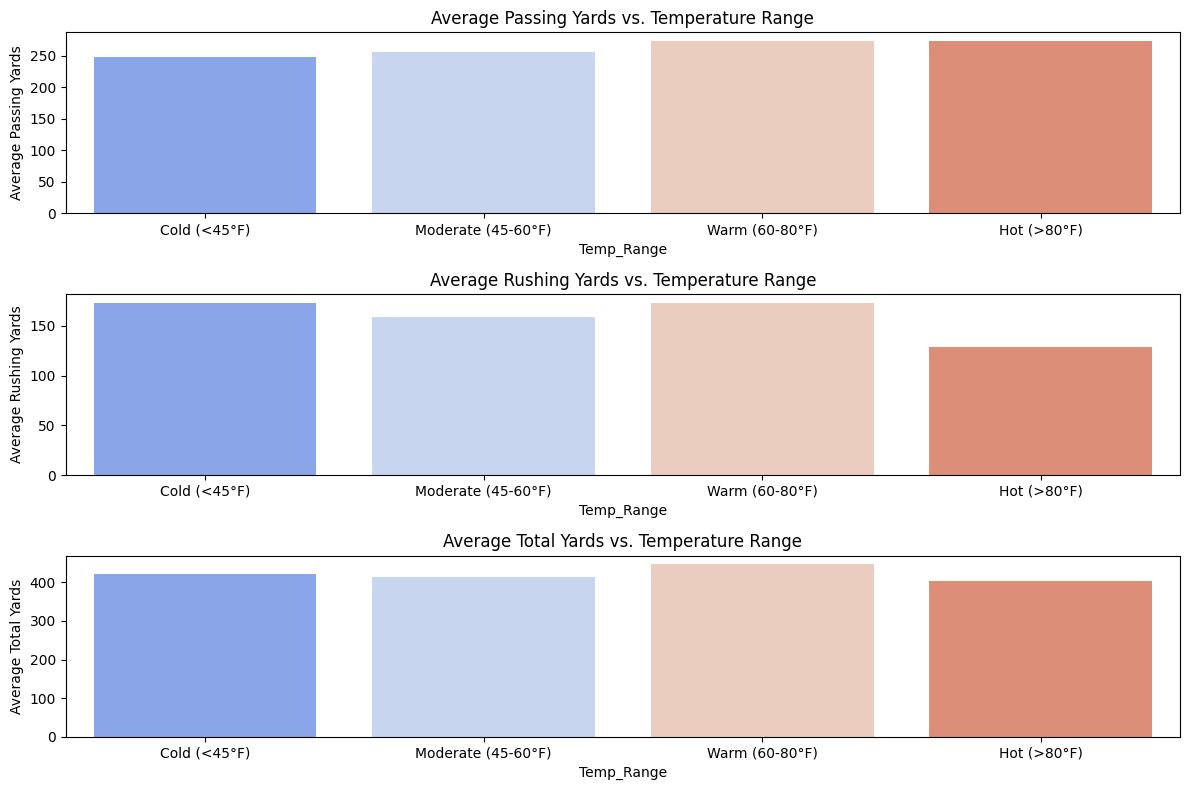

In [3]:
# Create temperature bins
temp_bins = [0, 45, 60, 80, 120] 
temp_labels = ['Cold (<45°F)', 'Moderate (45-60°F)', 'Warm (60-80°F)', 'Hot (>80°F)']
uw_data['Temp_Range'] = pd.cut(uw_data['temp_f'], bins=temp_bins, labels=temp_labels, right=False)

# Group by temperature range and calculate mean performance metrics
temp_grouped = uw_data.groupby('Temp_Range', observed=True).agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean'
}).reset_index()

# Plotting the data with color palette
plt.figure(figsize=(12, 8))

# Passing Yards
plt.subplot(3, 1, 1)
sns.barplot(x='Temp_Range', y='passing_yds', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Passing Yards vs. Temperature Range')
plt.ylabel('Average Passing Yards')

# Rushing Yards
plt.subplot(3, 1, 2)
sns.barplot(x='Temp_Range', y='rushing_yds', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Rushing Yards vs. Temperature Range')
plt.ylabel('Average Rushing Yards')

# Total Yards
plt.subplot(3, 1, 3)
sns.barplot(x='Temp_Range', y='total_yards', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Total Yards vs. Temperature Range')
plt.ylabel('Average Total Yards')

plt.tight_layout()
plt.show()


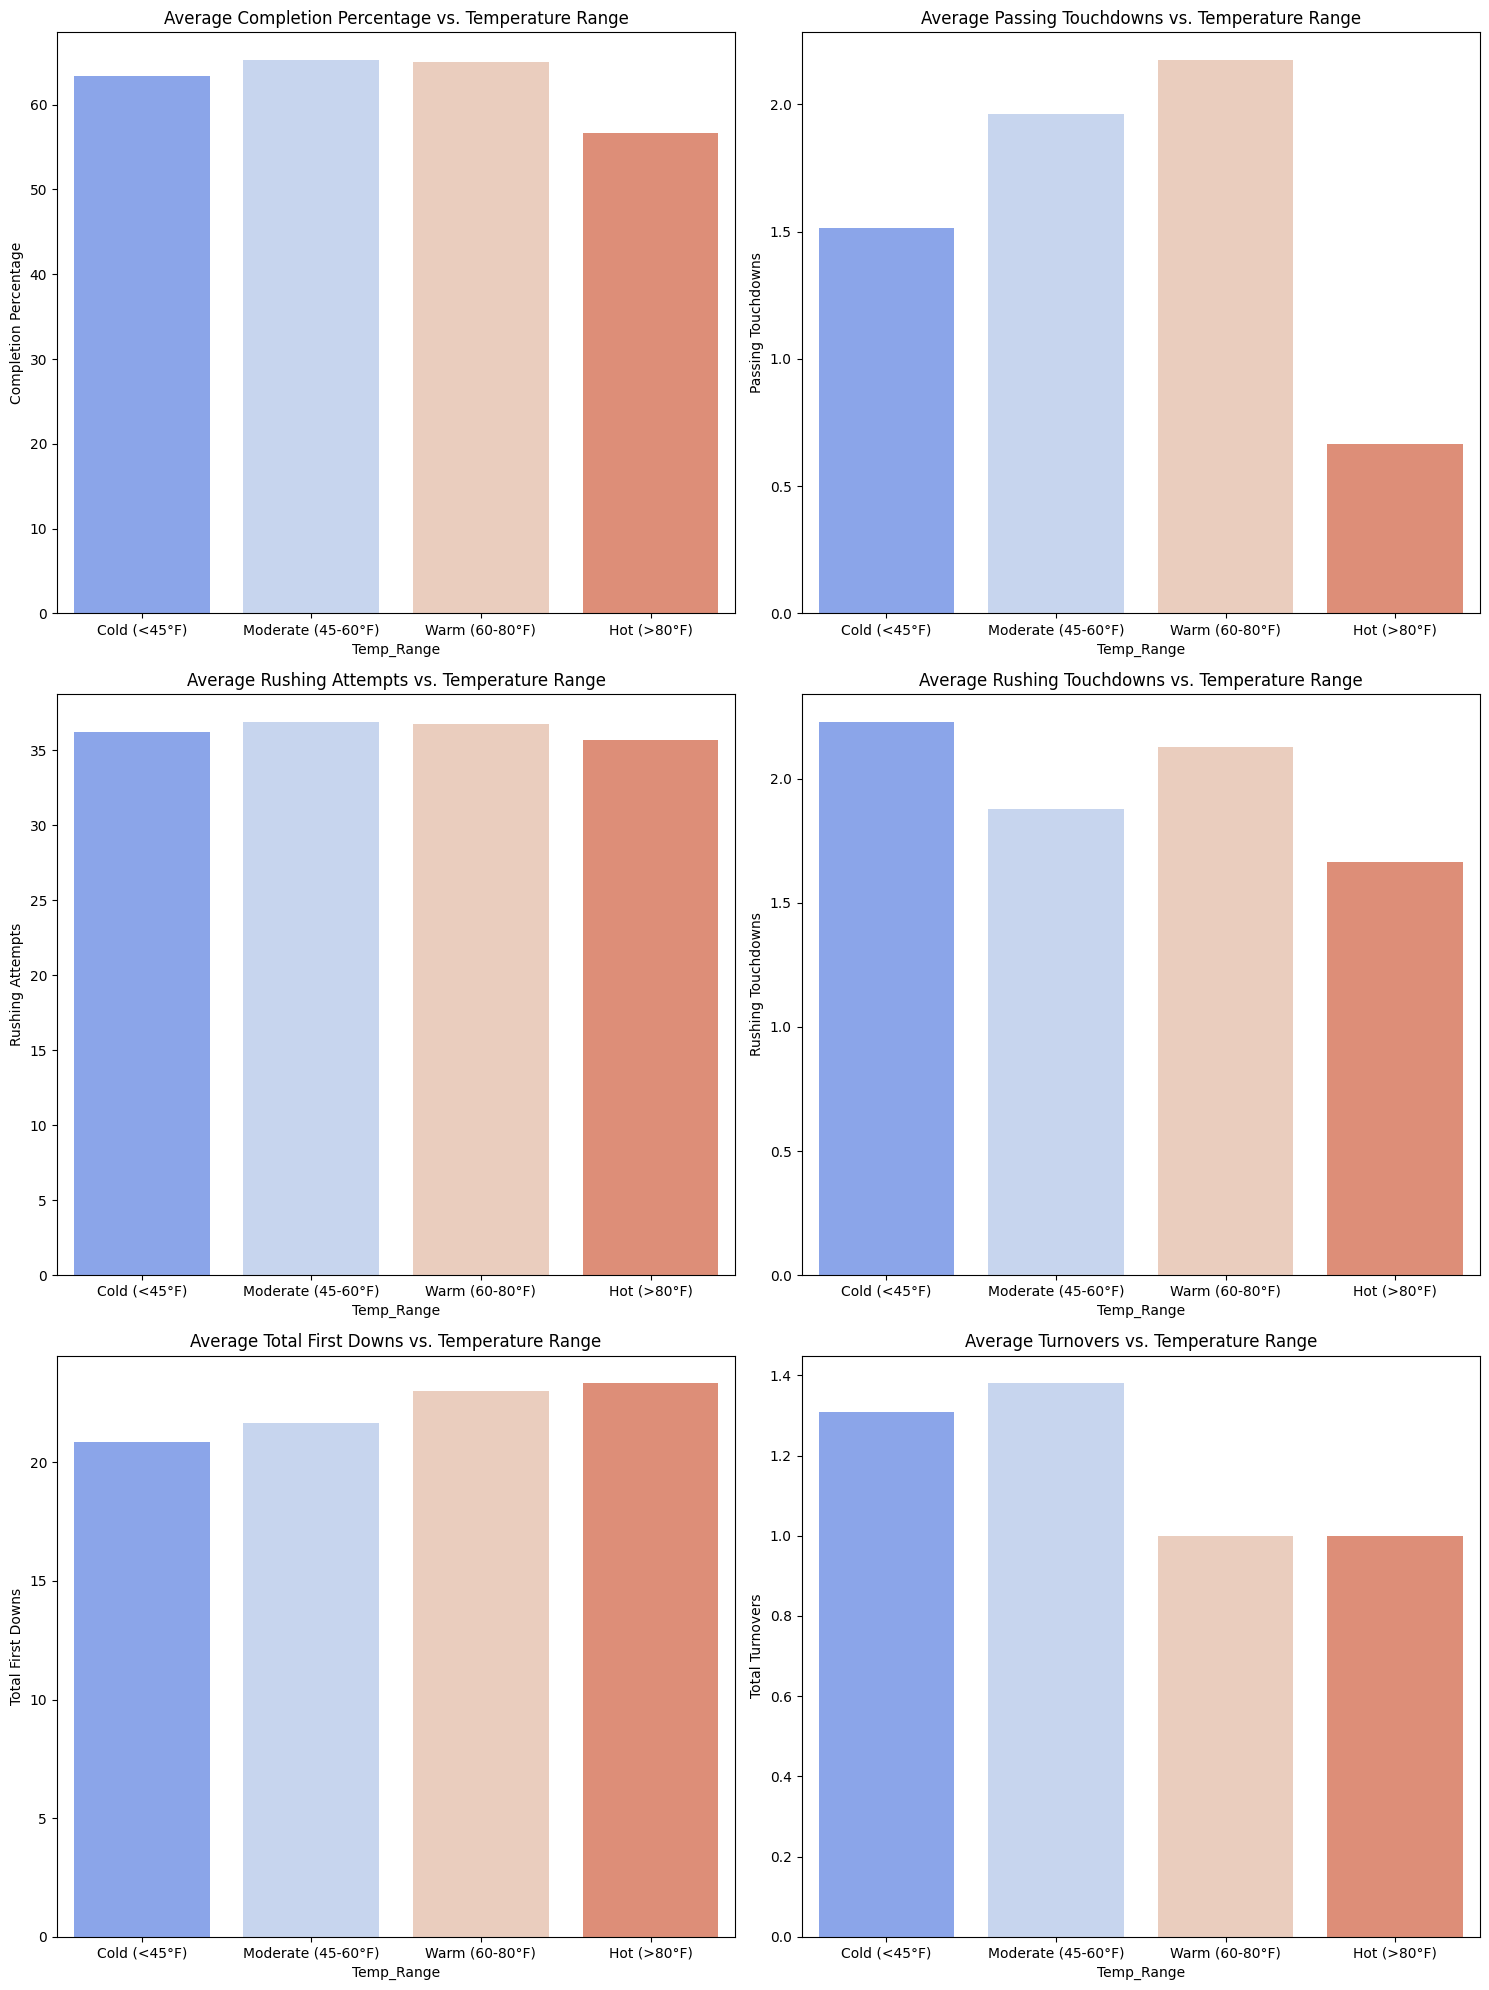

In [4]:
# Group by temperature range and calculate mean performance metrics
temp_grouped = uw_data.groupby('Temp_Range', observed=True).agg({
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'  # total_to includes both fumbles and interceptions
}).reset_index()

# Plotting the data
plt.figure(figsize=(15, 20))

# Completion Percentage
plt.subplot(3, 2, 1)
sns.barplot(x='Temp_Range', y='completion_pct', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Completion Percentage vs. Temperature Range')
plt.ylabel('Completion Percentage')
plt.legend([],[], frameon=False)

# Passing Touchdowns
plt.subplot(3, 2, 2)
sns.barplot(x='Temp_Range', y='passing_td', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Passing Touchdowns vs. Temperature Range')
plt.ylabel('Passing Touchdowns')
plt.legend([],[], frameon=False)

# Rushing Attempts
plt.subplot(3, 2, 3)
sns.barplot(x='Temp_Range', y='rushing_att', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Rushing Attempts vs. Temperature Range')
plt.ylabel('Rushing Attempts')
plt.legend([],[], frameon=False)

# Rushing Touchdowns
plt.subplot(3, 2, 4)
sns.barplot(x='Temp_Range', y='rushing_td', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Rushing Touchdowns vs. Temperature Range')
plt.ylabel('Rushing Touchdowns')
plt.legend([],[], frameon=False)

# Total First Downs
plt.subplot(3, 2, 5)
sns.barplot(x='Temp_Range', y='total_first_downs', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Total First Downs vs. Temperature Range')
plt.ylabel('Total First Downs')
plt.legend([],[], frameon=False)

# Total Turnovers
plt.subplot(3, 2, 6)
sns.barplot(x='Temp_Range', y='total_to', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Turnovers vs. Temperature Range')
plt.ylabel('Total Turnovers')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

In [5]:
# Calculate run-pass ratio/percentage
uw_data['run_percentage'] = (uw_data['rushing_att'] / uw_data['total_plays']) * 100
uw_data['pass_percentage'] = (uw_data['passing_att'] / uw_data['total_plays']) * 100


# Group by temperature range and calculate mean run and pass percentages
temp_grouped_ratio = uw_data.groupby('Temp_Range', observed=True).agg({
    'run_percentage': 'mean',
    'pass_percentage': 'mean'
}).reset_index()

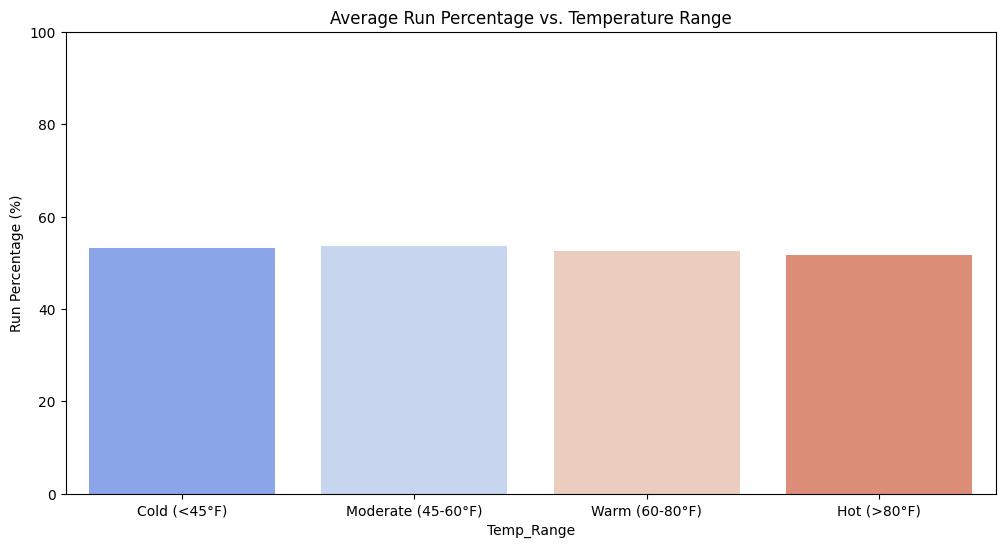

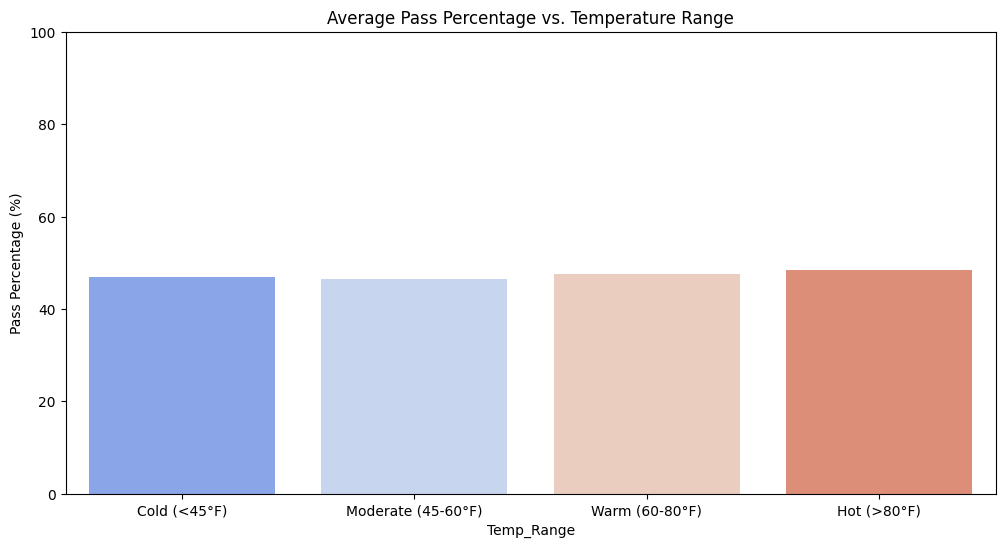

In [6]:
# Plotting the run percentage
plt.figure(figsize=(12, 6))

sns.barplot(x='Temp_Range', y='run_percentage', hue='Temp_Range', data=temp_grouped_ratio, palette='coolwarm', dodge=False)
plt.title('Average Run Percentage vs. Temperature Range')
plt.ylabel('Run Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to avoid bars hitting the top
plt.legend([],[], frameon=False)
plt.show()

# Plotting the pass percentage
plt.figure(figsize=(12, 6))

sns.barplot(x='Temp_Range', y='pass_percentage', hue='Temp_Range', data=temp_grouped_ratio, palette='coolwarm', dodge=False)
plt.title('Average Pass Percentage vs. Temperature Range')
plt.ylabel('Pass Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to avoid bars hitting the top
plt.legend([],[], frameon=False)
plt.show()

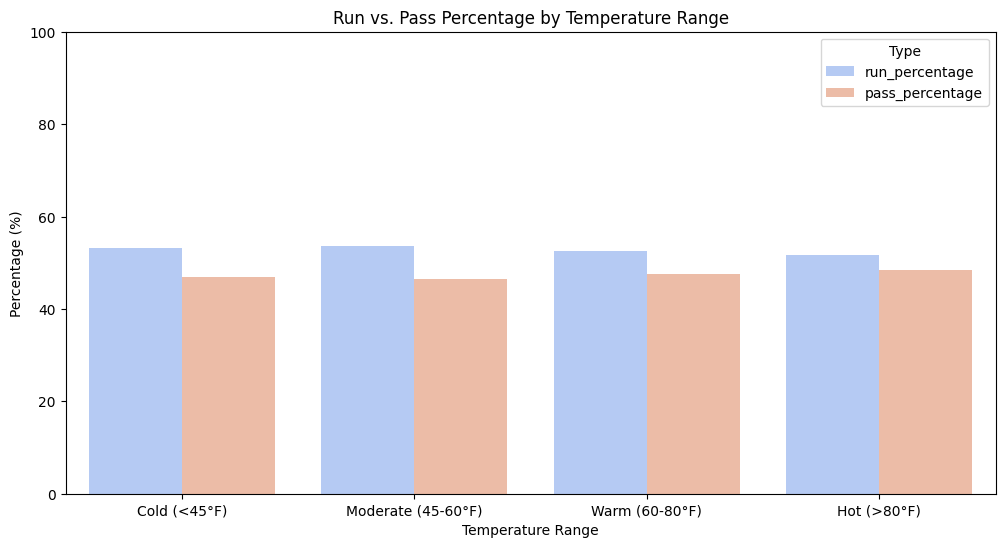

In [7]:
temp_grouped_ratio_melted = pd.melt(temp_grouped_ratio, id_vars='Temp_Range', value_vars=['run_percentage', 'pass_percentage'],
                                    var_name='Type', value_name='Percentage')

# Plotting the combined bar chart
plt.figure(figsize=(12, 6))

sns.barplot(x='Temp_Range', y='Percentage', hue='Type', data=temp_grouped_ratio_melted, palette='coolwarm')
plt.title('Run vs. Pass Percentage by Temperature Range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to avoid bars hitting the top
plt.xlabel('Temperature Range')
plt.show()